In [405]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt

TOPICS = {
    "topics.topic_0": "Command Line",
    "topics.topic_1": "Client-Server",
    "topics.topic_2": "Cloud",
    "topics.topic_3": "Resource Management",
    "topics.topic_4": "Error Handling & Logging"
}



In [406]:
df = pd.read_csv('full.csv')

In [407]:
df.drop(columns=['Unnamed: 0'], inplace=True)
for col in df.columns:
	if 'language' in col:
		df.drop(columns=[col], inplace=True)
df.describe()

,analyzed_paths,pairs,similarities,issues,commits,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
count,13703.000000,1.370300e+04,10467.000000,13703.000000,13703.000000,13703.000000,13703.000000,11468.000000,9266.000000,9049.000000,13703.000000,1.370300e+04,1.370300e+04,13703.000000,8324.000000,6996.000000
mean,76.884259,5.942503e+04,154.098596,174.068379,784.590309,26.883456,1160.930453,0.360950,0.279739,0.260759,10936.597023,8.822849e+04,1.700028e+04,350.551850,0.279741,0.319453
std,336.190415,1.930047e+06,1014.191085,1096.738333,3401.684323,96.088596,3632.434057,0.256544,0.213156,0.210155,42794.313040,3.295197e+05,9.286598e+04,1258.837789,0.237410,0.271506
min,2.000000,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,101.000000,0.010099,0.010063,0.010016,10.000000,7.200000e+01,0.000000e+00,2.000000,0.010025,0.010026
25%,6.000000,1.500000e+01,7.000000,7.000000,65.000000,3.000000,159.000000,0.143918,0.108315,0.090124,255.000000,1.498000e+03,1.170000e+02,15.000000,0.084595,0.076527
50%,17.000000,1.360000e+02,30.000000,25.000000,173.000000,7.000000,286.000000,0.309139,0.228687,0.206502,755.000000,4.567000e+03,4.380000e+02,40.000000,0.209104,0.244908
75%,51.000000,1.275000e+03,117.000000,88.000000,513.000000,21.000000,731.000000,0.537906,0.408324,0.386560,3188.000000,2.098000e+04,2.306000e+03,145.000000,0.422939,0.519784
max,18370.000000,1.687193e+08,80513.000000,60246.000000,164293.000000,3927.000000,117805.000000,0.999101,0.999764,0.997521,827986.000000,6.593969e+06,2.693242e+06,33349.000000,0.996716,0.999707


In [408]:
epsilon = 1e-6
df['contributors'] = df['contributors'].apply(lambda x: x if x > 0 else epsilon)
df['commits'] = df['commits'].apply(lambda x: x if x > 0 else epsilon)
df['issues'] = df['issues'].apply(lambda x: x if x > 0 else epsilon)
df['stars'] = df['stars'].apply(lambda x: x if x > 0 else epsilon)
df['analyzed_paths'] = df['analyzed_paths'].apply(lambda x: x if x > 0 else epsilon)
df['pairs'] = df['pairs'].apply(lambda x: x if x > 0 else epsilon)
df['similarities'] = df['similarities'].apply(lambda x: x if x > 0 else epsilon)

# df2 = df.loc[:, ["similarities", "issues"]]
# 
# epsilon = 1e-9
# df2['issues'] = df2['issues'].apply(lambda x: x if x > 0 else epsilon)
# df2.corr()


In [409]:
df_nona = df.dropna()

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
df.head()

Mean Squared Error: 96836.40828933466
Coefficients: [ 1.12912796e-04  1.97676821e-01 -8.05711146e-04  4.06896989e-06
 -4.39483167e-02 -4.01863091e-02]
Intercept: 117.08980766371077


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,0.692835,0.247408,0.058288,2539,12621,110,97,NaN,NaN
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,0.888254,NaN,0.106459,45439,425248,43672,1701,NaN,NaN
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,0.333218,0.591452,NaN,760,3971,327,64,0.074183,NaN
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,NaN,0.232586,0.029679,237,2759,213,4,NaN,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,0.118695,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917


In [410]:
def filter_outliers(series, lower_percentile=0.1, upper_percentile=0.99):
	lower_bound = series.quantile(lower_percentile)
	upper_bound = series.quantile(upper_percentile)
	return series[(series > lower_bound) & (series < upper_bound)]


df['log_stars'] = np.log1p(df['stars'])
df['log_contributors'] = np.log1p(df['contributors'])
df['log_commits'] = np.log1p(df['commits'])
df['log_pairs'] = np.log1p(df['pairs'])
df['log_analyzed_paths'] = np.log1p(df['analyzed_paths'])
df['log_issues'] = np.log1p(df['issues'])
df['log_similarities'] = np.log1p(df['similarities'])

df['log_stars'] = filter_outliers(df['log_stars'])
df['log_contributors'] = filter_outliers(df['log_contributors'])
df['log_commits'] = filter_outliers(df['log_commits'])
df['log_pairs'] = filter_outliers(df['log_pairs'])
df['log_analyzed_paths'] = filter_outliers(df['log_analyzed_paths'])
df['log_issues'] = filter_outliers(df['log_issues'])
df['log_similarities'] = filter_outliers(df['log_similarities'])

# remove nan values
df.dropna(inplace=True)

In [411]:
sample = df.sample(100)
sample.head()

,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,loc.nFiles,topics.topic_2,topics.topic_4,log_stars,log_contributors,log_commits,log_pairs,log_analyzed_paths,log_issues,log_similarities
1438,codegangsta/bwag,9,36,6.0,6.0,Apache-2.0,75,2014-10-04,10.0,197,...,15,0.057778,0.082719,5.288267,2.397895,4.330733,3.610918,2.302585,1.945910,1.945910
7527,VirtusLab/render,4,6,18.0,22.0,Apache-2.0,180,2018-10-19,10.0,138,...,13,0.151444,0.051256,4.934474,2.397895,5.198497,1.945910,1.609438,3.135494,2.944439
4830,segmentio/cwlogs,5,10,2.0,8.0,MIT,36,2017-05-22,10.0,142,...,338,0.022733,0.022886,4.962845,2.397895,3.610918,2.397895,1.791759,2.197225,1.098612
5157,GoogleCloudPlatform/metacontroller,46,1035,671.0,108.0,Apache-2.0,271,2017-09-15,18.0,789,...,74,0.932322,0.016785,6.672033,2.944439,5.605802,6.943122,3.850148,4.691348,6.510258
8385,google/schedviz,34,561,159.0,28.0,Apache-2.0,197,2019-07-24,15.0,505,...,67,0.150992,0.092676,6.226537,2.772589,5.288267,6.331502,3.555348,3.367296,5.075174


In [412]:
sample['log_similarities']

1438     1.945910
7527     2.944439
4830     1.098612
5157     6.510258
8385     5.075174
           ...   
2404     3.555348
11438    4.852030
205      5.963579
12950    1.098612
3335     4.143135
Name: log_similarities, Length: 100, dtype: float64

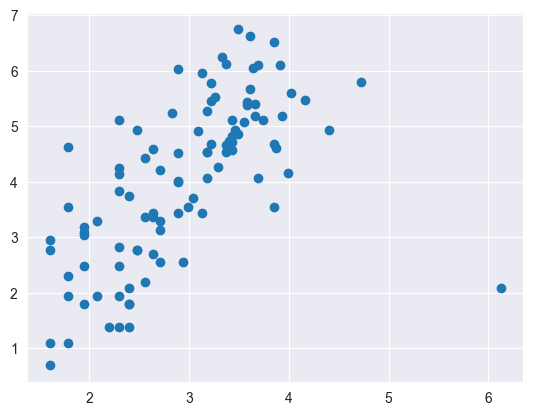

In [413]:
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])

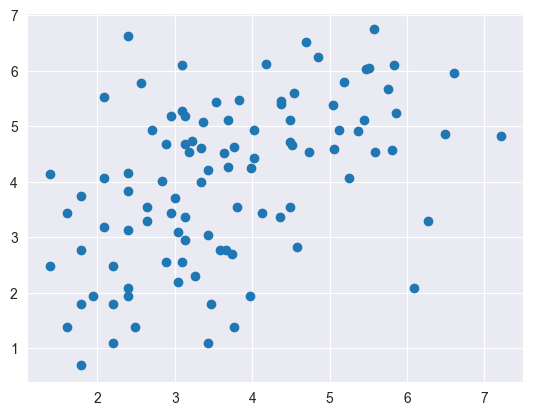

In [414]:
plt.scatter(sample['log_issues'], sample['log_similarities'])

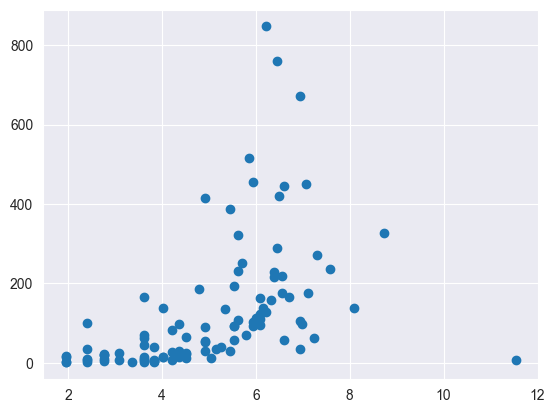

In [415]:
plt.scatter(sample['log_pairs'], sample['similarities'])

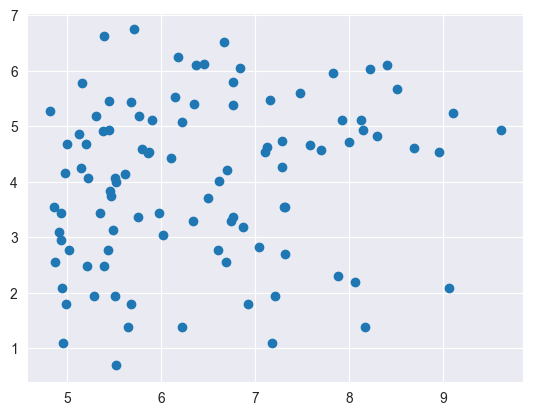

In [416]:
plt.scatter(sample['log_stars'], sample['log_similarities'])

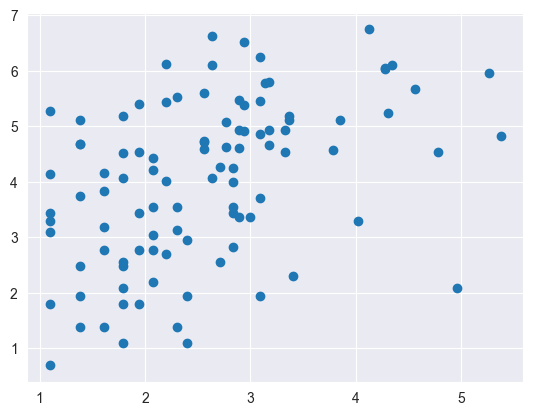

In [417]:
plt.scatter(sample['log_contributors'], sample['log_similarities'])

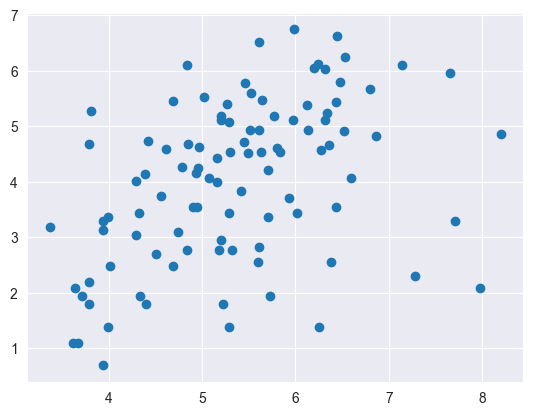

In [418]:
plt.scatter(sample['log_commits'], sample['log_similarities'])

In [419]:
reg_stars = np.polyfit(sample['log_stars'], sample['log_similarities'], deg = 1)
reg_stars

array([0.2193757 , 2.61394717])

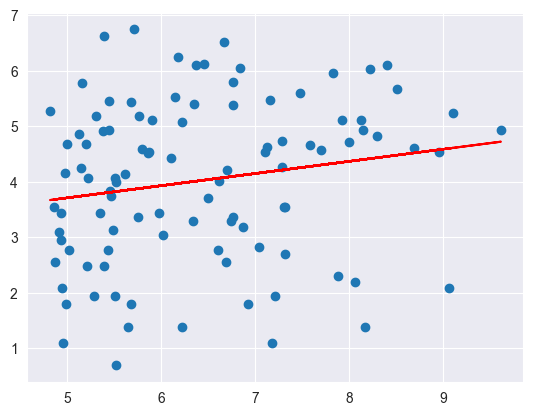

In [420]:
trend_stars = np.polyval(reg_stars, sample['log_stars'])
plt.scatter(sample['log_stars'], sample['log_similarities'])
plt.plot(sample['log_stars'], trend_stars, color='red')

In [421]:
reg_contributors = np.polyfit(sample['log_contributors'], sample['log_similarities'], deg = 1)
reg_contributors

array([0.65495945, 2.33972726])

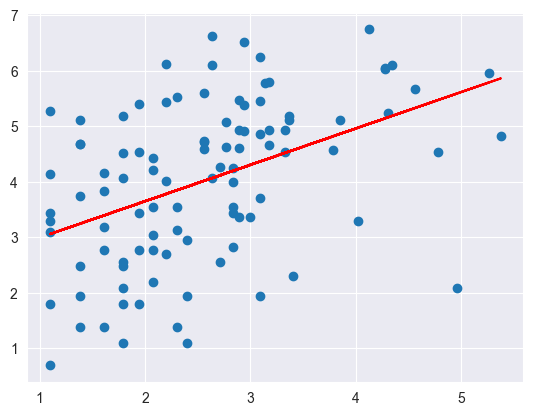

In [422]:
trend_contributors = np.polyval(reg_contributors, sample['log_contributors'])
plt.scatter(sample['log_contributors'], sample['log_similarities'])
plt.plot(sample['log_contributors'], trend_contributors, color='red')

In [423]:
reg_commits = np.polyfit(sample['log_commits'], sample['log_similarities'], deg = 1)
reg_commits

array([0.60051419, 0.80034255])

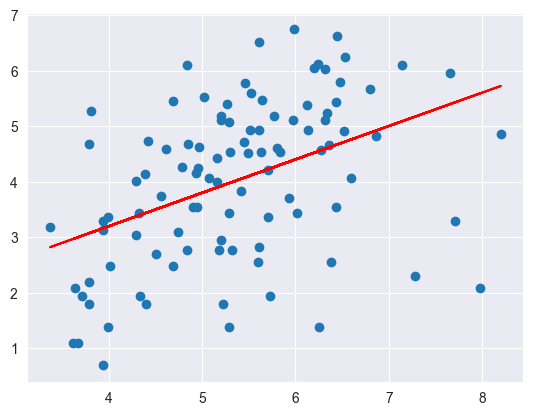

In [424]:
trend_commits = np.polyval(reg_commits, sample['log_commits'])
plt.scatter(sample['log_commits'], sample['log_similarities'])
plt.plot(sample['log_commits'], trend_commits, color='red')

In [425]:
reg_pairs = np.polyfit(sample['log_pairs'], sample['log_similarities'], deg = 1)
reg_pairs

array([0.53891113, 1.32854311])

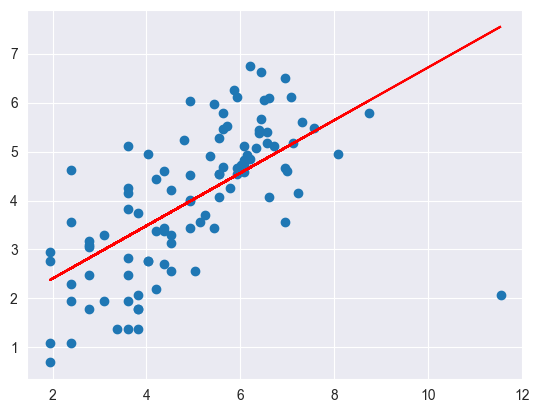

In [426]:
trend_pairs = np.polyval(reg_pairs, sample['log_pairs'])
plt.scatter(sample['log_pairs'], sample['log_similarities'])
plt.plot(sample['log_pairs'], trend_pairs, color='red')

In [427]:
reg_analyzed_paths = np.polyfit(sample['log_analyzed_paths'], sample['log_similarities'], deg = 1)
reg_analyzed_paths

array([1.14982669, 0.63225278])

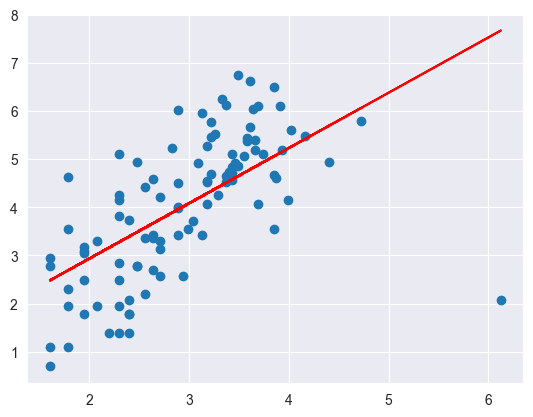

In [428]:
trend_analyzed_paths = np.polyval(reg_analyzed_paths, sample['log_analyzed_paths'])
plt.scatter(sample['log_analyzed_paths'], sample['log_similarities'])
plt.plot(sample['log_analyzed_paths'], trend_analyzed_paths, color='red')

In [429]:
reg_issues = np.polyfit(sample['log_issues'], sample['log_similarities'], deg = 1)
reg_issues

array([0.52536813, 2.08663029])

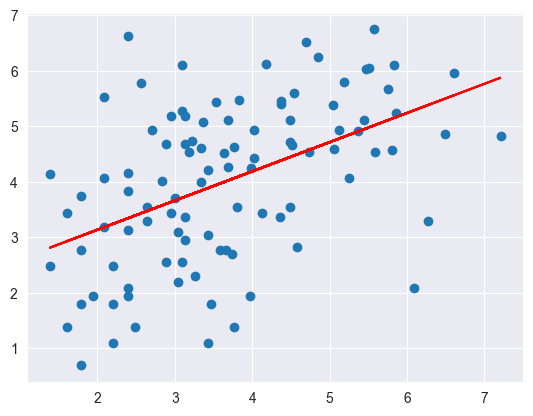

In [430]:
trend_issues = np.polyval(reg_issues, sample['log_issues'])
plt.scatter(sample['log_issues'], sample['log_similarities'])
plt.plot(sample['log_issues'], trend_issues, color='red')

<Axes: xlabel='log_stars', ylabel='log_similarities'>

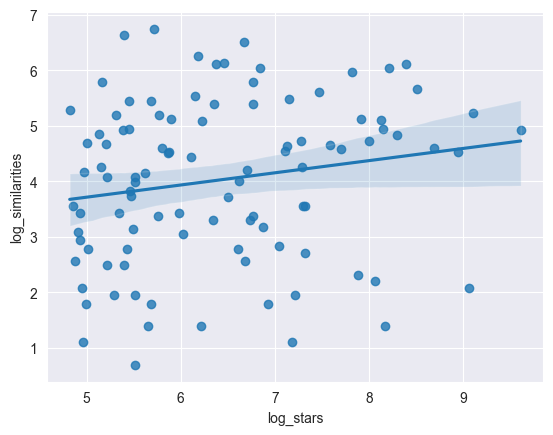

In [431]:
sb.regplot(x='log_stars', y='log_similarities', data=sample)

In [435]:
from sklearn.linear_model import RANSACRegressor

X = df[['log_stars', 'log_contributors', 'log_commits', 'log_pairs', 'log_analyzed_paths', 'log_issues']]
y = df['log_similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ransac = RANSACRegressor(LinearRegression())
ransac.fit(X_train, y_train)
y_pred = ransac.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (RANSAC): {mse}")


Mean Squared Error (RANSAC): 1.359477048450637


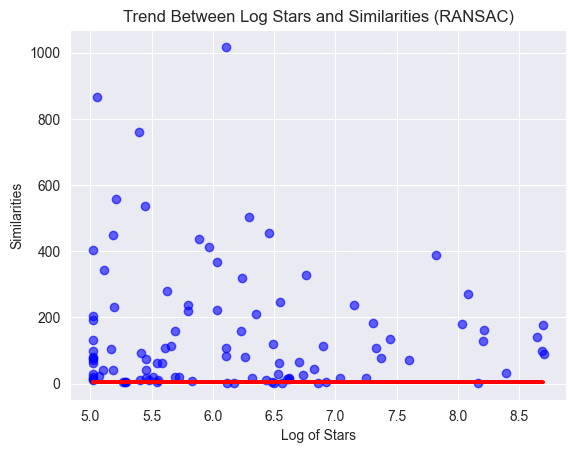

In [437]:
sample = df.sample(100)


trend_stars_ransac = np.polyval(np.polyfit(sample['log_stars'], ransac.predict(sample[['log_stars', 'log_contributors', 'log_commits', 'log_pairs', 'log_analyzed_paths', 'log_issues']]), 1), sample['log_stars'])
plt.scatter(sample['log_stars'], sample['similarities'], alpha=0.6, color='blue')
plt.plot(sample['log_stars'], trend_stars_ransac, color='red', linewidth=2)
plt.xlabel('Log of Stars')
plt.ylabel('Similarities')
plt.title('Trend Between Log Stars and Similarities (RANSAC)')
plt.grid(True)
plt.show()


# Regression as a Technical Indicator

In [ ]:
reg1 = np.polyfit(sample['log_stars'], sample['similarities'], deg = 1)
reg1

In [ ]:
trend1 = np.polyval(reg1, sample['log_stars'][-63:])
std = sample['similarities'][-63:].std()
plt.plot(sample['log_stars'], sample['similarities'], label = 'Similarities')

## Correlation Analysis

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh', color='royalblue')
plt.title('Feature Importances')
plt.show()

# Topic Distribution

In [ ]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df_nona.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
# tdf.head()






In [ ]:
tdf_resources = tdf[tdf['max_value_topic'] == 'topics.topic_3']
tdf_resources

In [ ]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()


In [ ]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
	autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [ ]:
# verify nones
# count topics 
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series

# Topic Distribution With Nones


In [ ]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
tdf.head()


In [ ]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(count_series, labels=count_series.index, autopct='%1.1f%%', colors=colors)
for autotext in autotexts:
    autotext.set_color('black')
plt.title('Frequency of Topics')
plt.show()



In [ ]:
count_series = tdf['max_value_topic'].map(TOPICS).value_counts()
count_series


# Clone Density


In [ ]:
tdf['clone_density'] = (tdf['loc.nFiles'] / tdf['similarities']) * 1000
tdf.head()

In [ ]:
# Assuming df is your DataFrame with the clone density already calculated
plt.figure(figsize=(10, 6))

# Density Plot
sb.kdeplot(tdf['clone_density'], fill=True, color='royalblue')

# Adding titles and labels
# plt.title('Density Plot of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram
sb.histplot(tdf['clone_density'], kde=False, bins=30, color='skyblue')

# Adding titles and labels
plt.title('Distribution of Clone Density per 1,000 Files Across Repositories', fontsize=16)
plt.xlabel('Clone Density per 1,000 Files', fontsize=14)
plt.ylabel('Number of Repositories', fontsize=14)

# Display the plot
plt.show()